In [79]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [80]:
df_test = pd.read_csv("/Users/alexandranava/Desktop/Spores/Analysis/constant_change.csv")
input_cols = ['INTENSITY','AREA','ELLIPSE_MINOR', "PERIMETER"]

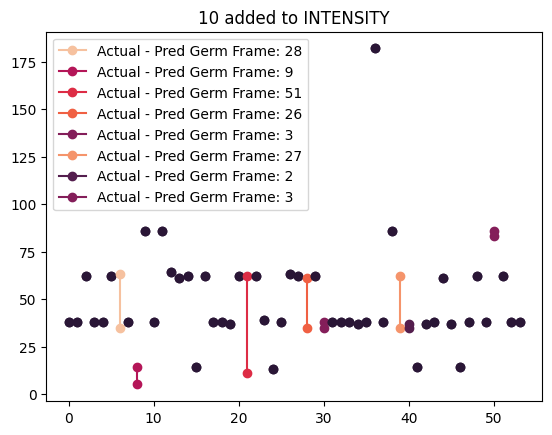

In [81]:
def plot_actual_predgerm(df, feature):
  import ast

  # Convert string representations of lists to actual lists
  actual_germ = ast.literal_eval(row["Actual Germination Frames"])
  pred_germ = ast.literal_eval(row["Predicted Germination Frames"])

  # Convert elements to integers to perform arithmetic operations
  actual_germ = [int(x) for x in actual_germ]
  pred_germ = [int(x) for x in pred_germ]

  diff_germ = [actual_germ[t] - pred_germ[t] for t in range(len(actual_germ))]
  colors = sns.color_palette("rocket", len(list(set(diff_germ))))
  color_dict = {}
  for i, tmp in enumerate(list(set(diff_germ))):
    color_dict[tmp] = colors[i]

  for i in range(len(actual_germ)):
    line_color = color_dict[diff_germ[i]]
    if line_color != color_dict[0]:
      label_i = rf"Actual - Pred Germ Frame: {diff_germ[i]}"
    else:
      label_i = None
    plt.plot([i, i],[actual_germ[i], pred_germ[i]], color = line_color, marker = "o", label = label_i)
  plt.legend()
  plt.title(f"{df['Constant']} added to {df['Feature']}")

for row_index in range(len(df_test)):
  row = df_test.iloc[row_index, :]
  plot_actual_predgerm(row, "hi")
  break 